## Importation des modules nécessaires et du fichier CSV à étudier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modified_train = pd.read_csv("../data/02_intermediate/sampled_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/02_intermediate/sampled_train.csv'

## Calcul des indicateurs demandés

### 1 - Vitesse moyenne de chaque trajet (en km/h)

In [17]:
modified_train['taxi_trip_speed'] = modified_train['Distance'] / modified_train['trip_duration_hours']
modified_train.head()
mean_taxi_trip_speed = round(modified_train['taxi_trip_speed'].mean(), ndigits=4)
print('La vitesse moyenne de chaque trajet est de {} km/h'.format(mean_taxi_trip_speed))

La vitesse moyenne de chaque trajet est de 14.3138 km/h


### 2 - Nombre de trajets effectués en fonction du jour de la semaine

{'Monday': 183453, 'Tuesday': 198846, 'Wednesday': 206187, 'Thursday': 214333, 'Friday': 219087, 'Saturday': 215896, 'Sunday': 190479}


<AxesSubplot:>

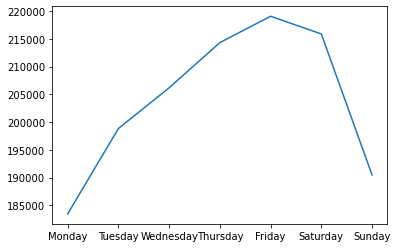

In [20]:
test = modified_train.week_day.value_counts()
days = {"Monday" : 0, "Tuesday" : 0, "Wednesday" : 0, "Thursday" : 0, "Friday" : 0, "Saturday" : 0, "Sunday" : 0}
for x in test.keys() :
    days[x] = test[x]
print(days)
sns.lineplot(x=days.keys(), y=days.values())

### 3 - Nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h

In [ ]:
modified_train['pickup_hour'] = modified_train['pickup_datetime'].apply(lambda x : str(x)[11:13])
modified_train['pickup_hour'] = modified_train['pickup_hour'].apply(lambda x : int(x))
ranges = [-1, 3, 7, 11, 15, 19, 23]
number_of_trips_per_hour = modified_train['pickup_hour'].value_counts(bins=ranges, sort=False)
loop_range = [0, 4, 8, 12, 16, 20]
for i in loop_range:
    print('Entre {}h et {}h, {} trajets ont été effectués'.format(i, i+4, number_of_trips_per_hour[i+1]))

### 4 - Nombre de km parcourus par jour de la semaine

In [21]:
DayKM = modified_train[["week_day", "Distance"]]
groupDK = DayKM.groupby("week_day")
print(groupDK.sum())

            Distance
week_day            
Friday     755607.50
Monday     665212.15
Saturday   731246.18
Sunday     722818.61
Thursday   743763.06
Tuesday    675406.00
Wednesday  698811.96
